In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn import linear_model, datasets
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
#from ggplot import *
%matplotlib inline

# set max row display
#pd.set_option('display.max_row', 1000)

# set max column width to 50
#pd.set_option('display.max_columns', 50)

In [3]:
adult = pd.read_csv('adult.txt', names=['age','workclass','fnlwgt','education','education-num','marital-status',
                                       'occupation','relationship','race','sex','capital-gain','captial-loss',
                                       'hours-per-week','native-country','income'])

IOError: File adult.txt does not exist

In [123]:
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,captial-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


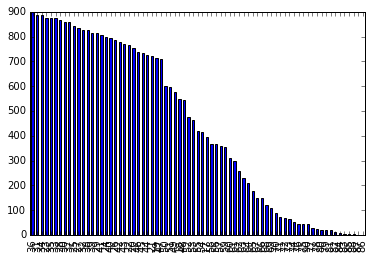

In [15]:
adult['age'].value_counts().plot(kind='bar')

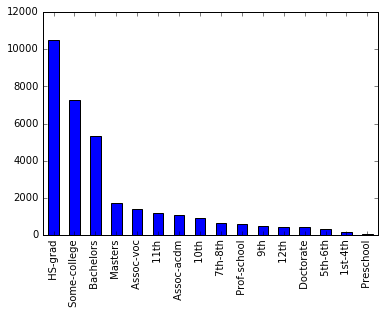

In [16]:
adult['education'].value_counts().plot(kind='bar')

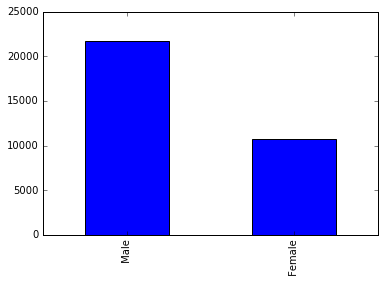

In [17]:
adult['sex'].value_counts().plot(kind='bar')

In [124]:
# some more data exploration
adult.groupby('income').mean()

,age,fnlwgt,education-num,capital-gain,captial-loss,hours-per-week
income,,,,,,
<=50K,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
>50K,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


In [125]:
adult.groupby('education').mean()

,age,fnlwgt,education-num,capital-gain,captial-loss,hours-per-week
education,,,,,,
10th,37.429796,196832.465166,6.0,404.574491,56.845659,37.052519
11th,32.355745,194928.077447,7.0,215.097872,50.079149,33.925957
12th,32.000000,199097.508083,8.0,284.087760,32.337182,35.780600
1st-4th,46.142857,239303.000000,2.0,125.875000,48.327381,38.255952
5th-6th,42.885886,232448.333333,3.0,176.021021,68.252252,38.897898
7th-8th,48.445820,188079.171827,4.0,233.939628,65.668731,39.366873
9th,41.060311,202485.066148,5.0,342.089494,28.998054,38.044747
Assoc-acdm,37.381443,193424.093721,12.0,640.399250,93.418932,40.504217
Assoc-voc,38.553546,181936.016643,11.0,715.051375,72.754703,41.610709


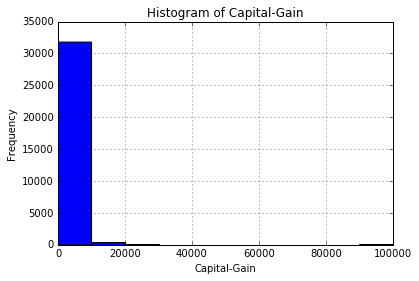

In [133]:
# histogram
adult['capital-gain'].hist()
plt.title('Histogram of Capital-Gain')
plt.xlabel('Capital-Gain')
plt.ylabel('Frequency')

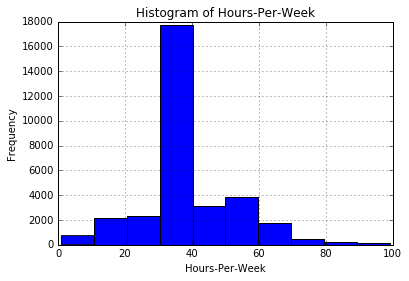

In [134]:
adult['hours-per-week'].hist()
plt.title('Histogram of Hours-Per-Week')
plt.xlabel('Hours-Per-Week')
plt.ylabel('Frequency')

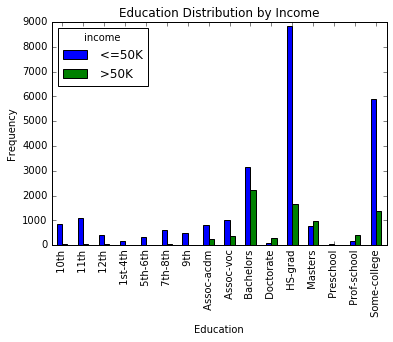

In [153]:
# barplot of education groupled by income (T/F, over 50K)
pd.crosstab(adult.education, adult.income).plot(kind='bar')
plt.title('Education Distribution by Income')
plt.xlabel('Education')
plt.ylabel('Frequency')

In [164]:
# use a stacked barplot to look at percentage of income (over/under) by education
education_income = pd.crosstab(adult.education, adult.income)
# not sure why getting NaN errors
#education_income.div(education_income.sum(1).astype(float))#.plot(kind='bar', stacked=True)

In [14]:
sample = adult.sample(frac=0.1)

In [7]:
# encode categorical variables to one of K
le = preprocessing.LabelEncoder()
#enc = preprocessing.OneHotEncoder()
sample['workclass'] = le.fit_transform(sample['workclass'])
#sample['workclass'] = enc.fit_transform(sample['workclass'])

In [9]:
le = preprocessing.LabelEncoder()
len(le.fit_transform(sample['workclass']))

3256

In [15]:
sample.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,captial-gain,captial-loss,hours-per-week,native-country,income
16341,63,Private,163809,Some-college,10,Widowed,Sales,Not-in-family,White,Female,0,0,20,United-States,<=50K
2492,26,Private,181666,HS-grad,9,Never-married,Handlers-cleaners,Own-child,White,Female,0,0,40,United-States,<=50K
20175,27,Private,199314,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,Poland,<=50K
24707,49,Private,188515,Some-college,10,Divorced,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
6599,39,Private,179668,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,15024,0,40,United-States,>50K


In [37]:
y = sample['income']
y.shape = 3256
y.shape

AttributeError: can't set attribute

In [52]:
# preprocessing, dealing with categorical variables
X = adult.drop('income', axis=1)
X = pd.get_dummies(X)
y = adult['income']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

logreg = linear_model.LogisticRegression()
logreg = logreg.fit(train_X,train_y)
#sample_dummy = pd.get_dummies(sample)
#sample_dummy.head()
logreg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [54]:
logreg.score(test_X, test_y)

0.79809611546138493

In [55]:
adult['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [56]:
7841/24720

0.31719255663430423

In [69]:
# examine coefficients
pd.DataFrame(data=[train_X.columns, np.transpose(logreg.coef_)]).T

,0,1
0,age,[-0.00609320797437]
1,fnlwgt,[-4.13568723997e-06]
2,education-num,[-0.00144070454516]
3,captial-gain,[0.000333587402939]
4,captial-loss,[0.000755913511905]
5,hours-per-week,[-0.00700975655886]
6,workclass_ ?,[-7.7390325164e-05]
7,workclass_ Federal-gov,[2.2057863878e-05]
8,workclass_ Local-gov,[2.65286191909e-06]
9,workclass_ Never-worked,[-3.41656754378e-07]


In [108]:
predicted = logreg.predict(test_X)
classes = logreg.classes_
#predicted = np.array([int(x == classes[0]) for x in predicted])
probs = logreg.predict_proba(test_X)
print(predicted)
print(probs)

[' <=50K' ' >50K' ' <=50K' ..., ' <=50K' ' <=50K' ' <=50K']
[[ 0.82972248  0.17027752]
 [ 0.32208422  0.67791578]
 [ 0.84731339  0.15268661]
 ..., 
 [ 0.7727109   0.2272891 ]
 [ 0.75179135  0.24820865]
 [ 0.73646451  0.26353549]]


In [101]:
# timing test
import timeit
t = 10000000
start = timeit.default_timer()
test1 = [x==1 for x in range(t)]
print(timeit.default_timer()-start)

start = timeit.default_timer()
test2 = list(map(lambda x: x==1, range(t)))
print(timeit.default_timer()-start)

1.0397603664296673
2.3741586238123222


In [106]:
test_y_bin = np.array([int(x==classes[0]) for x in test_y])

In [109]:
print(metrics.accuracy_score(test_y, predicted))
print(metrics.roc_auc_score(test_y_bin, probs[:,0]))

0.798096115461
0.587196869261


In [110]:
print(metrics.confusion_matrix(test_y, predicted))
print(metrics.classification_report(test_y, predicted))

[[4780  151]
 [1164  418]]
             precision    recall  f1-score   support

      <=50K       0.80      0.97      0.88      4931
       >50K       0.73      0.26      0.39      1582

avg / total       0.79      0.80      0.76      6513



In [112]:
# 10-fold cross-validation
scores = cross_val_score(linear_model.LogisticRegression(), train_X, train_y, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[ 0.79577735  0.80038388  0.7915547   0.80115163  0.79769674  0.79846449
  0.79232246  0.78963532  0.8049904   0.79869381]
0.79706707822
